In [483]:
import sys
!{sys.executable} -m pip install textblob
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [581]:
# Imports all necessary libraries
from textblob import TextBlob
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import textblob

#imports dataset used
df=pd.read_csv("dataset_5_revised.csv")

In [582]:
a=[]

# Loops over song_lyrings to create a column for lemmatized
for verses in df["song_lyrics"]:
    tb_doc=textblob.TextBlob(verses)
    tb_doc.words
    # Lemmatize words
    docs=[w.lemmatize() for w in tb_doc.words]
    a.append(docs)
df["lemmatized"]=a
b=[]
# Loops over lemmatized to create a column for word_count
for x in df["lemmatized"]:
    b.append(len(x))
df["word_count"]=b

In [583]:
c=[]
# Loops over lemmatized to create a column for sentence
for x in df["lemmatized"]:
    e=''
    cnt=0
    # For loop that iterates over column 'lemmatized' further for exceptional cases
    for word in x:
        if cnt == 0:
            e+=f"{word}"
        else:
            if (word == "'m")|(word=="'re")|(word=="'s")|(word=="n't")|(word=="'d")|(word=="'ll")|(word=="'ve"):
                e+=f"{word}"
            elif (word == '’')|(word == 'm'):
                e+=f"{word}"
            elif word == "s":
                e+=f"{word}"
            else:
                e+=f" {word}"
        cnt+=1
    e.strip()
    c.append(e)
df["sentence"]=c
d=[]
# Separates into better phrased words by splitting through whole sentence
for verse in df["sentence"]:
    words=verse.split(' ')
    d.append(words)
df["lemmatized"]=d

In [594]:
# Function that takes in matrix and tokens as parameters to create dataframe with index doc_1,doc_2,etc. and columns for token of words
def create_dataframe(matrix, tokens):

    doc_names = ['fav_song',f'doc']
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

similars=[]
fav_song=df.iloc[137]
fav_lyrics=fav_song["sentence"]

# For loop over 'sentence' column
cnt=0
for x in df["sentence"]:
    # List of fav_lyrics and each lyric
    data=[fav_lyrics,x]
    # Countvectorizer assigned to a variable
    vectorizer=CountVectorizer()
    # Fit_transform the list
    vector_m=vectorizer.fit_transform(data)
    # Get feature names of the list
    tokens=vectorizer.get_feature_names_out()
    v=vector_m.toarray()
    create_dataframe(v,tokens)
    # Matrix for cosine similarity
    cosine_matrix = cosine_similarity(vector_m)
    # Dataframe created for cosine similarity
    create_dataframe(cosine_matrix,['doc_1','doc_2'])
    # Tfidf vectorizer creation
    Tfidf_vect = TfidfVectorizer()
    vector_matrix = Tfidf_vect.fit_transform(data)
    tokens = Tfidf_vect.get_feature_names_out()
    # Dataframe created for Tfidf vectorizer
    df1=create_dataframe(vector_matrix.toarray(),tokens)
    cosine_similarity_matrix = cosine_similarity(vector_matrix)
    # Dataframe created for Tfidf vectorizer's cosine similarity
    df1=create_dataframe(cosine_similarity_matrix,['fav','doc_2'])
    similars.append(df1['fav'][1])
# Sort list into a hierarchical order highest to lowest
df['Similarities']=similars
df1=df.sort_values(by=['Similarities'])
df1=df1[::-1]
df1[:6]

,song title,artist/band name,year,lyrics url,song_lyrics,lemmatized,word_count,sentence,bag_word1,bag_word2,bag_word3,bag_word4,Similarities
137,Why Do Lovers Break Each Other's Hearts?,Hall & Oates,1977,https://www.azlyrics.com/lyrics/halloates/whyd...,Why Do Lovers Break Each Other's Hearts?\nI'll...,"[Why, Do, Lovers, Break, Each, Other's, Hearts...",80,Why Do Lovers Break Each Other's Hearts I'll n...,Why Each never don't saying one doin most a fo...,Do Other's know understand that else what When...,Lovers Hearts why He's there's While hurt you ...,Break I'll I always no he's the tell always it...,1.000000
233,Desperado,"Anderson, Lynn",1992,https://www.azlyrics.com/lyrics/lynnanderson/d...,"Desperado, why don't you come to your senses?\...","[Desperado, why, don't, you, come, to, your, s...",231,Desperado why don't you come to your sens You ...,Desperado come You fence now hard know your th...,why to been for Oh one that reason are hurt yo...,don't your out so you're but you These pleasin...,you sens ridin long a I got thing you somehow ...,0.416907
386,Reach Out,Nas,2012,https://www.azlyrics.com/lyrics/nas/reachout.html,DJ Hot Day\n\nThis kind of love is a once in a...,"[DJ, Hot, Day, This, kind, of, love, is, a, on...",636,DJ Hot Day This kind of love is a once in a li...,DJ kind a lifetime and that you see So alone t...,Hot of once groove touch I aw you lost I you A...,Day love in Reach the have baby standing and w...,This is a out love for I there all na my you I...,0.364576
14,You'll Never Know What You're Missin',"Nelson, Ricky",1959,https://www.azlyrics.com/lyrics/rickynelson/yo...,Have you ever wanted to steal a kiss\nHave you...,"[Have, you, ever, wanted, to, steal, a, kiss, ...",310,Have you ever wanted to steal a kiss Have you ...,Have to Have to let scared got you I'm But kno...,you steal you try her to you could sorry I why...,ever a ever But get death so cry for really 'C...,wanted kiss wanted you you And mad Well you do...,0.359537
429,Wolves,Kanye West,2016,https://www.azlyrics.com/lyrics/kanyewest/wolv...,"[Kanye West:]\nLost out, beat up\nDancin', dow...","[Kanye, West, Lost, out, beat, up, Dancin, dow...",528,Kanye West Lost out beat up Dancin down there ...,Kanye beat there somewhere there Lost Down fou...,West up I out right and there you down there a...,Lost Dancin found 'Round right beat dancin som...,out down you 'round there up I out right West ...,0.358433
177,Credit Card Baby,Wham!,1984,https://www.azlyrics.com/lyrics/wham/creditcar...,Said that you love me\r\nThought that it was t...,"[Said, that, you, love, me, Thought, that, it,...",438,Said that you love me Thought that it wa true ...,Said me wa that And that that But straight of ...,that Thought true you baby too you you With yo...,you that You needed I I were put the eye known...,love it said me believe thought shy me wink I ...,0.349958


In [585]:
# Find info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song title        499 non-null    object 
 1   artist/band name  499 non-null    object 
 2   year              499 non-null    int64  
 3   lyrics url        499 non-null    object 
 4   song_lyrics       499 non-null    object 
 5   lemmatized        499 non-null    object 
 6   word_count        499 non-null    int64  
 7   sentence          499 non-null    object 
 8   bag_word1         499 non-null    object 
 9   bag_word2         499 non-null    object 
 10  bag_word3         499 non-null    object 
 11  bag_word4         499 non-null    object 
 12  Similarities      499 non-null    float64
dtypes: float64(1), int64(2), object(10)
memory usage: 50.8+ KB


Text(0.5, 0.98, 'Year vs. Similarities')

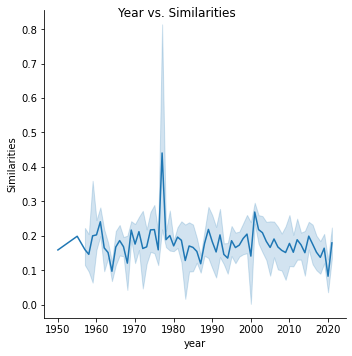

In [586]:
import seaborn as sns

# Relplot of df with x as 'year' and y as 'Similarities'
rel = sns.relplot(data=df, x='year', y='Similarities',kind='line')
rel.fig.suptitle('Year vs. Similarities')

In [588]:
# Save relplot as PDF
rel.savefig("project3_figure_jbae1.pdf")